In [1]:
from sys import path
from dolfin import *
from mshr import *
from Python_module_Quang import *

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import numpy as np
from numpy.core.records import array
from numpy.lib.function_base import append

lab_computer = True
if lab_computer: 
    # path of lab's computer
    sys.path.append(
        '/media/xuanquang/Gaumap Lab data/05_Git_project/FEniCS-RBniCS-examples/20210218_2D_tangential_load/'
    )
else:
    # path of MSI laptop
    sys.path.append(
        '/home/xuanquang/Project_Git/FEniCS-RBniCS-examples/20210218_2D_tangential_load/'
    )

try:
    import file
except:
    print("fail to import file")

try:
    import tangential_load
except:
    print("fail to import tangential_load.py")

format = "png"

from mpl_toolkits import mplot3d


In [2]:
def cal_magnitude(ux, uy):
    u_magnitude = []
    for i in range(len(ux)):
        norm = sqrt((ux[i])**2 + (uy[i])**2)
        u_magnitude.append(norm)
    return u_magnitude

In [3]:
""" main """

# import mesh
mesh = Mesh("data/elastic_block.xml")
V = VectorFunctionSpace(mesh, "Lagrange", 1)

u_FE = load_HDF5(V, mesh, title='u_FE')
u_magnitude = cal_u_magnitude(u=u_FE, mesh=mesh)
u_mag = array(u_magnitude.vector().get_local())

V_mag = FunctionSpace(mesh, "Lagrange", 1)

dof_coordinates = V_mag.tabulate_dof_coordinates()
print(dof_coordinates.shape)
n = V_mag.dim()
d = mesh.geometry().dim()
dof_coordinates.resize((n, d))
x = dof_x = dof_coordinates[:, 0]
y = dof_y = dof_coordinates[:, 1]  



(1174, 2)


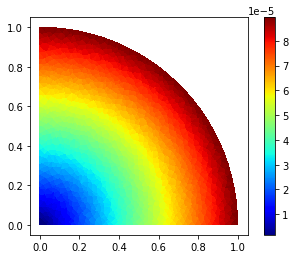

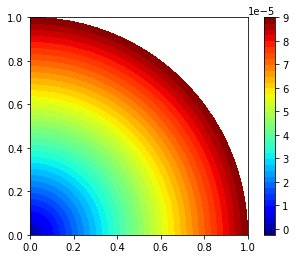

In [4]:
plt.figure()
plot(u_FE, mode="displacement")
plt.jet()
plt.colorbar(plot(u_FE, mode="displacement"))

# plt.figure()
# plot(mesh)

plt.figure()
plt.colorbar(plot(u_magnitude))


# plt.show()

In [5]:
X, Y= x, y
Z = z = u_mag

print(len(x))
# print(x.shape)

print(len(y))
# print(y.shape)

print(len(u_mag))
# print(u_magnitude.shape)


1174
1174
1174


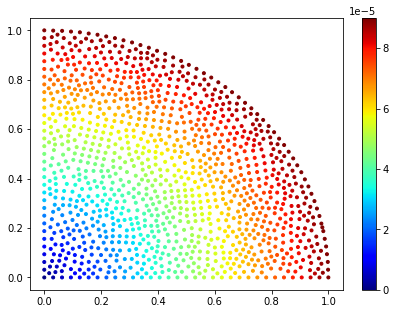

In [32]:
# fig = plt.figure()                                                               
# ax = fig.add_subplot(111) #, projection='3d') 
# ax = plt.subplot(nrows=1, ncols=1, figsize=(6, 6))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

# first = ax.scatter(x, y, u_FE.vector().get_local(), c='b', marker='.') 
# plt.colorbar(first)
z = u_magnitude.vector().get_local()
cs = np.arange(len(u_magnitude.vector().get_local())) / len(u_magnitude.vector().get_local())
p = ax.scatter(x, y, c=z, marker=".") 
fig.colorbar(p)
plt.show()
plt.close()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.recarray'>


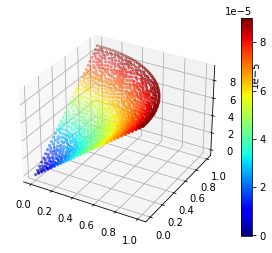

In [22]:
fig = plt.figure()                                                          
ax = fig.add_subplot(111, projection='3d')                                       
# p= ax.scatter(dof_x, dof_y, u.vector().get_local(), c='b', marker='.') 
print(type(x))
print(type(y))
print(type(u_mag))

p = ax.scatter(dof_x, dof_y, u_mag, c=u_mag, marker=".") 
fig.colorbar(p)
plt.show()

In [8]:
# marker_size=15

# x_extract, y_extract = file.extract_ux_uy(u=x)

# plt.scatter(x, y, marker_size, c=u_FE.vector().get_local())
# plt.title("Point observations")
# plt.xlabel("x")
# plt.ylabel("y")
# cbar= plt.colorbar()
# cbar.set_label("elevation (m)", labelpad=+1)

In [9]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import LogNorm

# x_list = np.array(x)
# y_list = np.array(y)
# z_list = np.array(z)

# N = int(len(z_list)**.5)
# z = z_list.reshape(N, N)
# plt.imshow(z, extent=(np.amin(x_list), np.amax(x_list), np.amin(y_list), np.amax(y_list)), norm=LogNorm(), aspect = 'auto')
# plt.colorbar()
# plt.show()

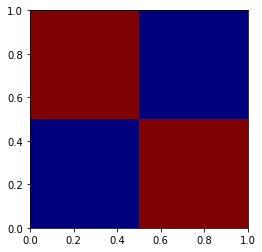

In [10]:
# from boxfield import *
# u_box = FEniCSBoxField(u, (nx, ny))

In [11]:
import pandas as pd

df = pd.DataFrame({
    'x': array(x),
    'y': array(y),
    'z': u_mag,
})

df.to_csv("solution/sample.csv", index=False)

(1174, 1)


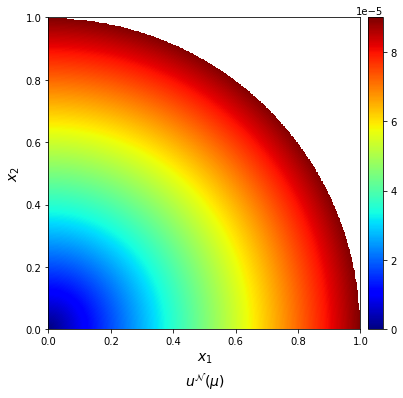

In [38]:
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib

# matplotlib.rc('font', family='serif', serif='cm10')
# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


interpolation_point = 500
# xline = np.linspace(0, 1, interpolation_point)
# yline = np.linspace(0, 1, interpolation_point)
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

grid_x, grid_y = np.meshgrid(xline, yline)
# R_list = np.linspace(0.8, 0.9, 11)  # Choose 11 or 21

FE_data = pd.read_csv('solution/sample.csv')
FE_data = FE_data.dropna()
FE_data.columns = ['x_coord', 'y_coord', 'u_mag']
FE_points = FE_data[['x_coord', 'y_coord']].values
FE_mag = FE_data[['u_mag']].values

print(FE_mag.shape)

max_AE_list=[]

def visualize_abs_error(FE_mag):
    # Visualize absolute error
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    # abs_error = FE_mag
    # max_AE = max(abs_error)
    # min_AE = min(abs_error)
    # max_AE_list.append(max_AE)
    # vmin_AE, vmax_AE = min (min_AE),max(max_AE)

    # Visualize FE solution
    FE_grid = griddata(FE_points, FE_mag, (grid_x, grid_y))
    FE_grid = FE_grid.reshape(interpolation_point, interpolation_point)
    img1 = ax1.imshow(FE_grid,
                        extent=[x.min(), x.max(), y.min(), y.max()],
                        cmap='jet',
                        origin='lower')
    ax1.set_xlabel(r'$x_1$', fontsize=14)
    ax1.set_ylabel(r'$x_2$', fontsize=14)
    ax1.set_title(r'$u^{\mathcal{N}}({\mu})$',
                    fontsize=14,
                    y=-0.2)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar1 = fig.colorbar(img1, cax=cax)
    cbar1.formatter.set_powerlimits((0, 0))

visualize_abs_error(FE_mag)